In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path='C:/Users/FT-LT74/Desktop/notes/github/time-series-forecasting-store-sales/data/interim/'

In [3]:
df=pd.read_csv(path+'merged_df.csv')
df

C:\Users\FT-LT74\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (12,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,dcoilwtico,holiday_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008770,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,2155.0,47.57,NaN,NaN,NaN,NaN,NaN
3008771,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,2155.0,47.57,NaN,NaN,NaN,NaN,NaN
3008772,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,2155.0,47.57,NaN,NaN,NaN,NaN,NaN
3008773,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,2155.0,47.57,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008775 entries, 0 to 3008774
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   city          object 
 7   state         object 
 8   store_type    object 
 9   cluster       int64  
 10  transactions  float64
 11  dcoilwtico    float64
 12  holiday_type  object 
 13  locale        object 
 14  locale_name   object 
 15  description   object 
 16  transferred   object 
dtypes: float64(3), int64(4), object(10)
memory usage: 390.2+ MB


## EDA plots

#### Sales performance

In [5]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,dcoilwtico,holiday_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False


<AxesSubplot:xlabel='store_nbr'>

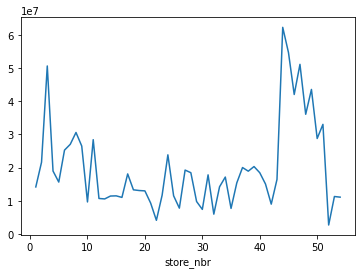

In [13]:
df.groupby(by=['store_nbr'])['sales'].sum().plot(kind='line', x='store_nbr', y='sales')

<AxesSubplot:xlabel='date'>

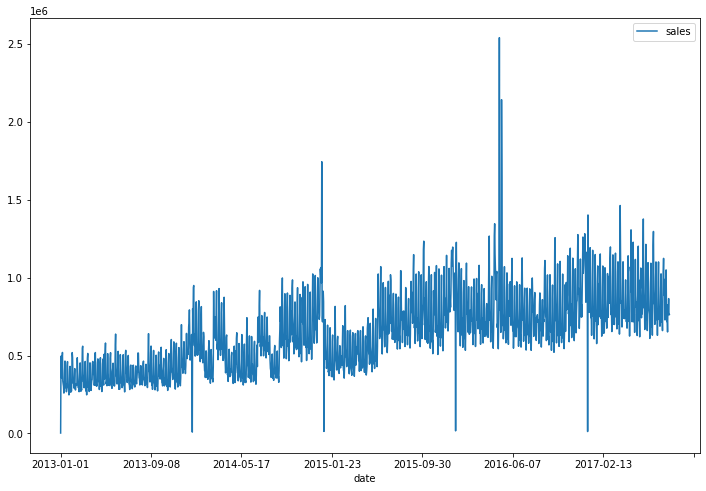

In [23]:
df.groupby(by=['date'])['sales'].sum().plot(kind='line', x='date', y='sales', legend=True, figsize=(12,8))

## Data Cleaning: check for NAs

In [ ]:
df.isna().any()

## check is holiday is celebrated where the store is located

matching by:
* locale='Local', store's city
* locale='Regional', store's state

In [ ]:
df['city'].unique()

In [ ]:
df['state'].unique()

In [ ]:
df['locale_name'].unique()

In [ ]:
df['locale'].unique()

In [ ]:
df[(df['state']==df['locale_name']) & (df['locale']=='Regional')]

In [ ]:
df[(df['city']==df['locale_name'])  & (df['locale']=='Local')]

In [ ]:
df[(df['state']==df['locale_name']) & (df['locale']=='Local')]  ## city and state name are the same